In [2]:
from yawisi.parameters import SimulationParameters

params = SimulationParameters("./config.ini")
print(params)

Number of Samples Initialized @ 1800
Sample Time Initialized @ 0.1
Wind Mean Speed Initialized @ 20
turbulence length scale for longitudinal component @ 170.0
turbulence length scale for transversal component @ 100.0
turbulence length scale for vertical component @ 35.0
Std of wind fluctuation of the longitudinal component @ 2.6
std of wind fluctuation of the transversal component @  2.2
std of wind fluctuation of the vertical component @ 1.56
PL Exp Law initialized  @ 0.3
Reference Height @ 80.0
Grid Width @ 100.0
Grid Height @ 100.0
Grid Length @ 11



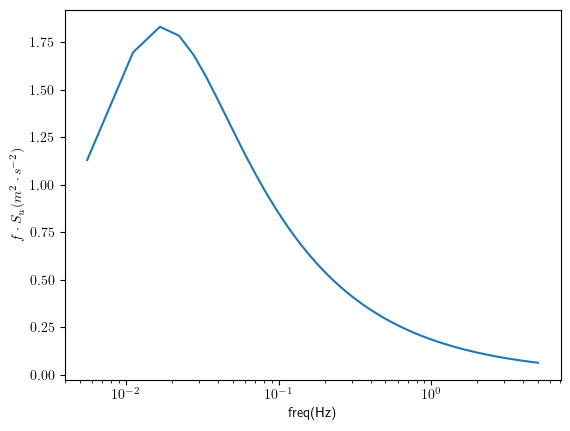

In [16]:
from yawisi.spectrum import Spectrum
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

spectrum = Spectrum(params)

plt.plot(spectrum.freq, spectrum.freq*spectrum.array[:, 0])
plt.xscale('log')
plt.xlabel('freq(Hz)')
plt.ylabel(r'$ f \cdot S_{u} ( m^2 \cdot s^{-2})$')
plt.show()



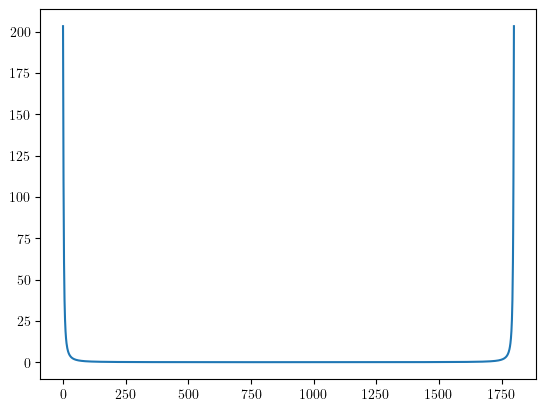

In [17]:
plt.plot(spectrum.symetrized(0))

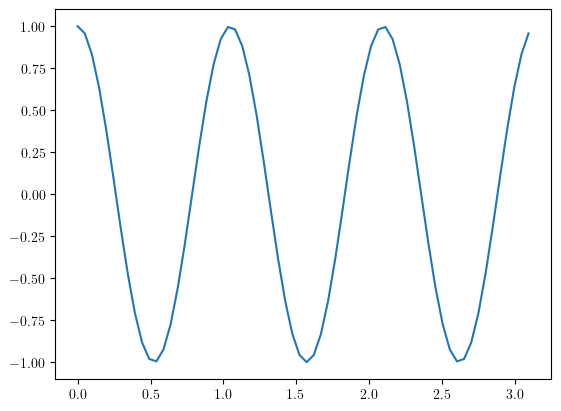

(-4.281664875873637e-15+0j)
(-8.694801398758635e-15+0j)
[-6.10622664e-15-1.37463567e-15j -4.92440917e-15+1.03432050e-15j
  3.20000000e+01-1.49178872e-14j  5.50548259e-15-5.39859205e-15j
 -5.25699957e-16-3.37556882e-15j  4.30635350e-15-2.73102357e-15j
  1.55031957e-15-1.84484227e-15j  2.97439606e-15-2.81832588e-15j
  6.45507377e-15-2.99241283e-16j  5.93709359e-16+6.40840476e-15j
 -1.68365798e-17+1.47834560e-15j -3.32507610e-18-3.80112123e-15j
  3.55271368e-15+2.51114492e-15j -1.76634599e-16+3.73580974e-15j
  5.84007326e-15+2.75342174e-15j -2.54694140e-15+1.48492330e-15j
 -3.88578059e-15+2.17807801e-15j -3.91323417e-15+3.20588892e-15j
 -9.15933995e-16-1.01234384e-15j -4.07876285e-15-4.56692080e-15j
 -1.89747671e-16-3.18040406e-15j -7.27894692e-16-8.73763734e-16j
  2.58915810e-15-2.25392893e-15j  5.30990859e-15-3.20690393e-15j
  2.06343680e-15-1.42232037e-16j  6.60497686e-15+6.17645495e-15j
 -3.60437890e-15+4.15750560e-15j  2.26662755e-15+9.41035740e-16j
  0.00000000e+00+4.28750176e-15j -

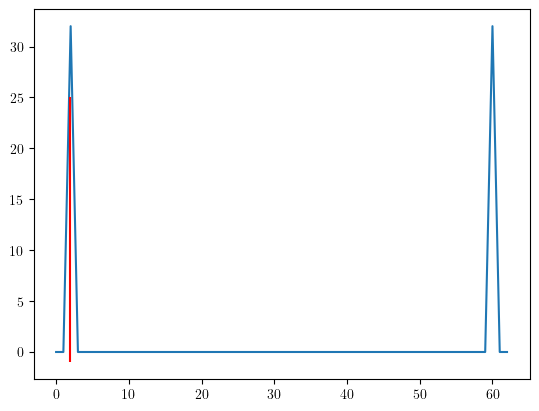

In [37]:
import numpy as np 
import math

n=64
x = np.arange(0, math.pi, math.pi/n)
y = np.cos(6*x)

plt.plot(x, y)
plt.show()
y_f = np.fft.fft(y)

print(y_f[0])
print(y_f[n//2])
print(y_f[1:n//2])


plt.plot(y_f[1:].real)
#plt.plot(y_f.imag)
plt.vlines(6/math.pi, -1, 25, 'r')
# print(y_f.imag)


(4096, 3)
20480.0 0.00244140625
3.046808529967026 3.2
2.1341785771302444 2.2
1.530052008090537 1.56


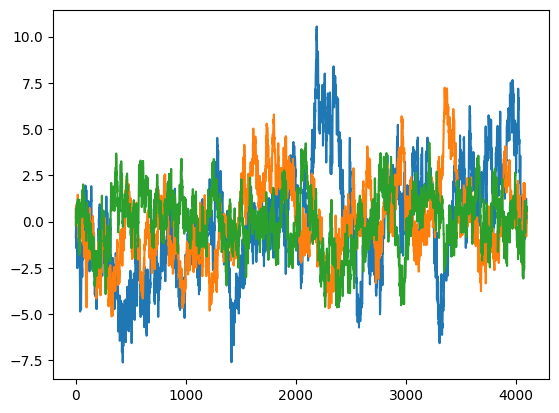

In [50]:
import numpy as np
from yawisi.spectrum import Spectrum
from yawisi.parameters import SimulationParameters
import matplotlib.pyplot as plt

params = SimulationParameters(None)
params.n_samples = 4096
params.sample_time = 0.1
params.sigma_1 = 3.2

spectrum = Spectrum(params)

fft_seed = np.exp(1.0j * np.random.uniform(0, 2 * np.pi, size=(spectrum.N_freq, 3)))

one_d = np.multiply(fft_seed, np.sqrt(spectrum.array.astype(np.complex128)))
full = np.vstack(
            [np.zeros(shape=(1, 3)), one_d[:-1, :], np.real(one_d[-1, :]), np.conjugate(one_d[-2::-1, :])]
        )
print(full.shape)
uvw = np.fft.ifft(full, axis=0) *np.sqrt(spectrum.N_freq/params.sample_time)
plt.plot(uvw[:, 0].real)
plt.plot(uvw[:, 1].real)
plt.plot(uvw[:, 2].real)

print(spectrum.N_freq/params.sample_time, spectrum.df)

s = np.std(uvw.real, axis=0)
print(s[0], params.sigma_1)
print(s[1], params.sigma_2)
print(s[2], params.sigma_3)




In [81]:
f = np.array([1, 2, 3, 4])

d = np.random.random(size=(3, 2))
u = 2*np.ones(shape=(3,2))

print(d)
print(u)
x = - 2*d/u
print(x)
res = x[:,:,np.newaxis]*f
print(res[:,:,1])



[[0.10233443 0.41405599]
 [0.69440016 0.41417927]
 [0.04995346 0.53589641]]
[[2. 2.]
 [2. 2.]
 [2. 2.]]
[[-0.10233443 -0.41405599]
 [-0.69440016 -0.41417927]
 [-0.04995346 -0.53589641]]
[[-0.20466886 -0.82811198]
 [-1.38880032 -0.82835854]
 [-0.09990692 -1.07179281]]


In [211]:
import numpy as np
from yawisi.spectrum import Spectrum
from yawisi.parameters import SimulationParameters
from yawisi.profile import PowerProfile
from yawisi.locations import Locations, SinglePoint
import matplotlib.pyplot as plt

params = SimulationParameters(None)
params.n_samples = 18000
params.sample_time = 0.1
params.sigma_1 = 2.6

points = Locations.create("points")
points.add_points([(0, z) for z in range(60, 61)])
#n_points = len(points)

spectrum = Spectrum(params)  # Spectre du signal de vent

profile = PowerProfile(params)
mean_u = profile(points)
mean_u_jk = .5 * np.add.outer(mean_u.ravel(), mean_u.ravel())

delta_r_jk = (
    points.get_distance_matrix()
) 

print(delta_r_jk)

C = 7.5 

cru_jk = C*delta_r_jk/mean_u_jk

Coh_jk = np.exp( -cru_jk[:,:, np.newaxis]*spectrum.freq)
print(Coh_jk.shape)

print(spectrum.freq[0])
print(C)


[[0.]]
(1, 1, 9000)
0.0005555555555555556
7.5


In [212]:
Sf = spectrum.compute(points)
print(Sf.shape)

n_points = len(points)

print(Sf[:, np.newaxis, :, :].shape)
print(Sf[np.newaxis, :, :, :].shape)
print(Coh_jk[:,:,:,np.newaxis].shape)
Sf_jk = np.sqrt(Sf[:, np.newaxis, :, :] * Sf[np.newaxis, :, :, :]) * \
             Coh_jk[:, :, :, np.newaxis]

   
print(Sf_jk.shape)
#print(Sf_jk[0, 0, 0:12 ], Sf[0, 0:12, 0])


(1, 9000, 3)
(1, 1, 9000, 3)
(1, 1, 9000, 3)
(1, 1, 9000, 1)
(1, 1, 9000, 3)


In [213]:
print(Sf_jk.shape)

transposed = np.transpose(Sf_jk, axes=(3, 2, 1, 0))
print(transposed.shape)

#print(transposed[0, : , :])
L = np.linalg.cholesky(transposed)
print(L.shape)
#print(L[0, : , :])



(1, 1, 9000, 3)
(3, 9000, 1, 1)
(3, 9000, 1, 1)


In [214]:


one = np.ones(shape=(n_points, 1))
filtered = np.zeros(shape=(spectrum.N_freq, n_points, 3), dtype=np.complex128)
for j in range(3):
    for i in range(spectrum.N_freq):
        vec = np.exp(1.0j * np.random.uniform(0, 2 * np.pi, size=n_points))
        X = np.diag(vec)
        hx1_f = np.dot(np.dot(L[j, i, :, :], X), one).squeeze(1)  
        filtered[i, :, j] = hx1_f

print(filtered.shape)
# filtered = hx1[0, :]
# print(filtered.shape)

(9000, 1, 3)


In [225]:
 # On a besoin de reconstruire un tableau représentant une fft réelle.
full = np.vstack(
            [
                np.zeros(shape=(1, n_points, 3)),
                filtered[:-1, :, :],
                np.real(filtered[-1:, :, :]),
                np.conjugate(filtered[-2::-1, :, :]),
            ]
        )
print(full.shape, spectrum.N_freq,  params.sample_time)
u = np.real(np.fft.ifft(full, axis=0)) * np.sqrt(spectrum.N_freq / params.sample_time)

8999 1 8999
(18000, 1, 3) 9000 0.1


1.5405154896997664


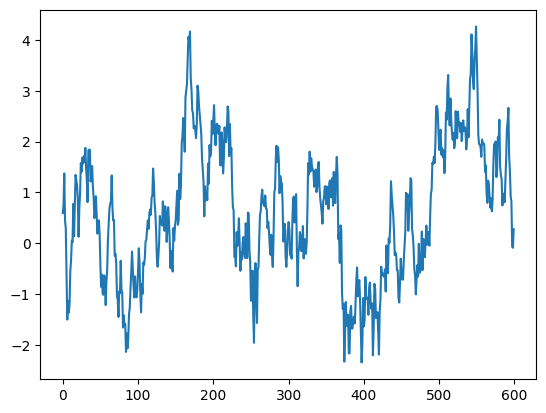

In [224]:

plt.plot(u[:600, 0, 2])
# plt.plot(u[:, 1, 2])
# plt.plot(u[:, 2, 2])
# plt.plot(u[:, 6, 2])

for i in range(n_points):
    print(np.std(u[:, i, 2]))

In [152]:
vec = np.exp(1.0j * np.random.uniform(0, 2 * np.pi, size=n_points))
X = np.diag(vec)
print(X.shape)
# X = np.zeros(shape=(spectrum.N_freq, n_points, n_points), dtype=np.complex128)
# for i in range(n_points):
#     X[:, i, i] = 
# one = np.ones(shape=(n_points, 1))


(11, 11)
